# NFL Draft Combine from 2010-2023

By Dominic Graziano

Explanation of data - this data was taken from Pro Football Reference <br>

Player = Players first and last name <br>
Pos = Position played <br>
School = university attended <br>
Ht = Measurement of height <br>
Wt = Measurement of weight <br>
40yd = timed 40 yard dash in seconds <br>
Vertical = measured vertical jump in inches <br>
Broad Jump = measured broad jump in inches <br>
3Cone = timed 3 cone drill in seconds <br>
Shuttle = timed short shuttle drill in seconds <br>
Drafted(tm-rnd-yr) = team that drafted player, the round in draft, pick number in draft, and draft year


### Merging Data Streams and Cleaning

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
#from matplotlib import style 
#style.use('dark_background')
#import numpy as np
#from sklearn.cluster import KMeans

In [156]:
FileNames = glob.glob('data/Combine_Results_*.csv')
print(FileNames)

['data/Combine_Results_2013.csv', 'data/Combine_Results_2012.csv', 'data/Combine_Results_2010.csv', 'data/Combine_Results_2011.csv', 'data/Combine_Results_2015.csv', 'data/Combine_Results_2014.csv', 'data/Combine_Results_2016.csv', 'data/Combine_Results_2017.csv', 'data/Combine_Results_2019.csv', 'data/Combine_Results_2018.csv', 'data/Combine_Results_2020.csv', 'data/Combine_Results_2021.csv', 'data/Combine_Results_2023.csv', 'data/Combine_Results_2022.csv']


In [157]:
combine_df = pd.concat(pd.read_csv(f) for f in FileNames)
combine_df.drop(['College','Player-additional'], axis = 1, inplace = True)
combine_df.head()

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm-rnd-yr)
0,Oday Aboushi,OT,Virginia,6-5,308.0,5.41,23.5,17.0,100.0,7.92,4.84,New York Jets / 5th / 141st pick / 2013
1,Johnny Adams,CB,Michigan State,5-10,185.0,4.48,NaN,16.0,NaN,NaN,NaN,NaN
2,Robert Alford,CB,SE Louisiana,5-10,188.0,4.39,40.0,17.0,132.0,6.89,4.23,Atlanta Falcons / 2nd / 60th pick / 2013
3,Keenan Allen,WR,California,6-2,206.0,4.58,NaN,NaN,NaN,NaN,NaN,San Diego Chargers / 3rd / 76th pick / 2013
4,Ryan Allen,P,Louisiana Tech,6-1,229.0,4.98,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4741 entries, 0 to 323
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               4741 non-null   object 
 1   Pos                  4741 non-null   object 
 2   School               4741 non-null   object 
 3   Ht                   4712 non-null   object 
 4   Wt                   4717 non-null   float64
 5   40yd                 4194 non-null   float64
 6   Vertical             3731 non-null   float64
 7   Bench                3166 non-null   float64
 8   Broad Jump           3671 non-null   float64
 9   3Cone                2794 non-null   float64
 10  Shuttle              2909 non-null   float64
 11  Drafted (tm-rnd-yr)  3010 non-null   object 
dtypes: float64(7), object(5)
memory usage: 481.5+ KB


In [159]:
print('Missing Values')
for col in combine_df:
    noVal = sum(combine_df[col].isna())
    print('{}: {}'.format(col,noVal))

Missing Values
Player: 0
Pos: 0
School: 0
Ht: 29
Wt: 24
40yd: 547
Vertical: 1010
Bench: 1575
Broad Jump: 1070
3Cone: 1947
Shuttle: 1832
Drafted (tm-rnd-yr): 1731


combine_df['Drafted (tm/rnd/yr)'] = combine_df['Drafted (tm/rnd/yr)'].str.replace('/','-')

#### Part 1: Changing the Ht column to the format I want

I want to the Ht column to be changed to inches rather than the string, so I split the column, change data types, run a calculation, then merge the foot and inch column into one column

In [160]:
combine_df['Ht'] = combine_df['Ht'].astype('string')
combine_df[['Ft_conversion', 'in']] = combine_df.Ht.str.split('-', expand = True)
combine_df = combine_df.drop('Ht', axis = 1)

In [161]:
combine_df['Ft_conversion'] = combine_df['Ft_conversion'].astype(float)
combine_df['in'] = combine_df['in'].astype(float)

combine_df['Ft_conversion'] = combine_df['Ft_conversion'] * 12

In [162]:
combine_df['Height_in_inches'] = combine_df['Ft_conversion'] + combine_df['in']

combine_df = combine_df.drop(['Ft_conversion','in'], axis = 1)

#### Part 2: Splitting Drafted(tm-rnd-yr) into 4 columns

Splitting into the 4 columns and then deleting the original Drafted(tm-rnd-yr)

In [163]:
combine_df['Drafted (tm-rnd-yr)'] = combine_df['Drafted (tm-rnd-yr)'].astype('string')
combine_df[['Drafted_Team','Round_Num', 'Pick_Num', 'Year']] = combine_df['Drafted (tm-rnd-yr)'].str.split('/', expand = True)

In [164]:
combine_df = combine_df.drop('Drafted (tm-rnd-yr)', axis = 1)

I want to get the round number and pick number without the text, as well as changing the data type. Additionally changing the null values in the 4 columns 

In [165]:
combine_df['Drafted_Team'] = combine_df['Drafted_Team'].fillna('Undrafted')

combine_df['Round_Num'] = combine_df['Round_Num'].str[:2]
combine_df['Round_Num'] = combine_df['Round_Num'].fillna('0')
combine_df['Round_Num'] = combine_df['Round_Num'].astype(int)

combine_df['Pick_Num'] = combine_df['Pick_Num'].str.replace('\D+','')
combine_df['Pick_Num'] = combine_df['Pick_Num'].fillna('0')
combine_df['Pick_Num'] = combine_df['Pick_Num'].astype(int)

combine_df['Year'] = combine_df['Year'].fillna('Undrafted')

combine_df.head()

/var/folders/kf/8556syz14vn70lw4383jfz_c0000gn/T/ipykernel_37650/3617020214.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  combine_df['Pick_Num'] = combine_df['Pick_Num'].str.replace('\D+','')


,Player,Pos,School,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Height_in_inches,Drafted_Team,Round_Num,Pick_Num,Year
0,Oday Aboushi,OT,Virginia,308.0,5.41,23.5,17.0,100.0,7.92,4.84,77.0,New York Jets,5,141,2013
1,Johnny Adams,CB,Michigan State,185.0,4.48,NaN,16.0,NaN,NaN,NaN,70.0,Undrafted,0,0,Undrafted
2,Robert Alford,CB,SE Louisiana,188.0,4.39,40.0,17.0,132.0,6.89,4.23,70.0,Atlanta Falcons,2,60,2013
3,Keenan Allen,WR,California,206.0,4.58,NaN,NaN,NaN,NaN,NaN,74.0,San Diego Chargers,3,76,2013
4,Ryan Allen,P,Louisiana Tech,229.0,4.98,NaN,NaN,NaN,NaN,NaN,73.0,Undrafted,0,0,Undrafted


#### Part 3: Fixing null values for the rest of the columns

In [166]:
combine_df['Wt'] = combine_df['Wt'].fillna(0)
combine_df['40yd'] = combine_df['40yd'].fillna(0)
combine_df['Vertical'] = combine_df['Vertical'].fillna(0)
combine_df['Bench'] = combine_df['Bench'].fillna(0)
combine_df['Broad Jump'] = combine_df['Broad Jump'].fillna(0)
combine_df['3Cone'] = combine_df['3Cone'].fillna(0)
combine_df['Shuttle'] = combine_df['Shuttle'].fillna(0)
combine_df['Height_in_inches'] =  combine_df['Height_in_inches'].fillna(0)

In [167]:
combine_df.head()

,Player,Pos,School,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Height_in_inches,Drafted_Team,Round_Num,Pick_Num,Year
0,Oday Aboushi,OT,Virginia,308.0,5.41,23.5,17.0,100.0,7.92,4.84,77.0,New York Jets,5,141,2013
1,Johnny Adams,CB,Michigan State,185.0,4.48,0.0,16.0,0.0,0.00,0.00,70.0,Undrafted,0,0,Undrafted
2,Robert Alford,CB,SE Louisiana,188.0,4.39,40.0,17.0,132.0,6.89,4.23,70.0,Atlanta Falcons,2,60,2013
3,Keenan Allen,WR,California,206.0,4.58,0.0,0.0,0.0,0.00,0.00,74.0,San Diego Chargers,3,76,2013
4,Ryan Allen,P,Louisiana Tech,229.0,4.98,0.0,0.0,0.0,0.00,0.00,73.0,Undrafted,0,0,Undrafted


Checking to see if we have filled all the values in, and if true we can move on

In [168]:
print('Missing Values')
for col in combine_df:
    noVal = sum(combine_df[col].isna())
    print('{}: {}'.format(col,noVal))

Missing Values
Player: 0
Pos: 0
School: 0
Wt: 0
40yd: 0
Vertical: 0
Bench: 0
Broad Jump: 0
3Cone: 0
Shuttle: 0
Height_in_inches: 0
Drafted_Team: 0
Round_Num: 0
Pick_Num: 0
Year: 0


Reorder the columns to what I want

In [169]:
combine_df = combine_df[['Player','Pos','School','Drafted_Team','Round_Num','Pick_Num','Year','Height_in_inches','Wt','40yd','Vertical','Bench','Broad Jump','3Cone','Shuttle']]
combine_df.head()

,Player,Pos,School,Drafted_Team,Round_Num,Pick_Num,Year,Height_in_inches,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
0,Oday Aboushi,OT,Virginia,New York Jets,5,141,2013,77.0,308.0,5.41,23.5,17.0,100.0,7.92,4.84
1,Johnny Adams,CB,Michigan State,Undrafted,0,0,Undrafted,70.0,185.0,4.48,0.0,16.0,0.0,0.00,0.00
2,Robert Alford,CB,SE Louisiana,Atlanta Falcons,2,60,2013,70.0,188.0,4.39,40.0,17.0,132.0,6.89,4.23
3,Keenan Allen,WR,California,San Diego Chargers,3,76,2013,74.0,206.0,4.58,0.0,0.0,0.0,0.00,0.00
4,Ryan Allen,P,Louisiana Tech,Undrafted,0,0,Undrafted,73.0,229.0,4.98,0.0,0.0,0.0,0.00,0.00


Noticing that there are more position names than neccessary, I wanted to simplify things by merging the positions <br>

OLB, EDGE, DE = EDGE <br>
DT, DL = IDL <br>
S, SAF = S <br>
OL, G, OG, C = IOL <br>
LB, ILB = LB <br>
CB, DB = DB <br>


In [170]:
combine_df.Pos.unique()

array(['OT', 'CB', 'WR', 'P', 'OG', 'ILB', 'RB', 'DE', 'QB', 'DT', 'FB',
       'OLB', 'S', 'K', 'C', 'TE', 'LS', 'DL', 'LB', 'EDGE', 'OL', 'DB'],
      dtype=object)

In [171]:
combine_df.loc[combine_df['Pos'] == 'OLB','Pos'] = 'EDGE'
combine_df.loc[combine_df['Pos'] == 'DE','Pos'] = 'EDGE'
combine_df.loc[combine_df['Pos'] == 'SAF','Pos'] = 'S'
combine_df.loc[combine_df['Pos'] == 'OL','Pos'] = 'IOL'
combine_df.loc[combine_df['Pos'] == 'G','Pos'] = 'IOL'
combine_df.loc[combine_df['Pos'] == 'OG','Pos'] = 'IOL'
combine_df.loc[combine_df['Pos'] == 'C','Pos'] = 'IOL'
combine_df.loc[combine_df['Pos'] == 'ILB','Pos'] = 'LB'
combine_df.loc[combine_df['Pos'] == 'CB','Pos'] = 'DB'
combine_df.loc[combine_df['Pos'] == 'DT','Pos'] = 'IDL'
combine_df.loc[combine_df['Pos'] == 'DL','Pos'] = 'IDL'


In [172]:
combine_df.Pos.value_counts()

WR      670
EDGE    578
DB      574
IOL     448
RB      426
IDL     405
LB      313
OT      307
S       306
TE      266
QB      238
P        81
K        65
FB       42
LS       22
Name: Pos, dtype: int64

## Analysis and Visualizations

### Visualization 1: Pairplot

In [173]:
combine_df = combine_df.reset_index(drop = True)

Starting off with a pairplot to see if there are any interesting correlatons between variables that need to be further looked into

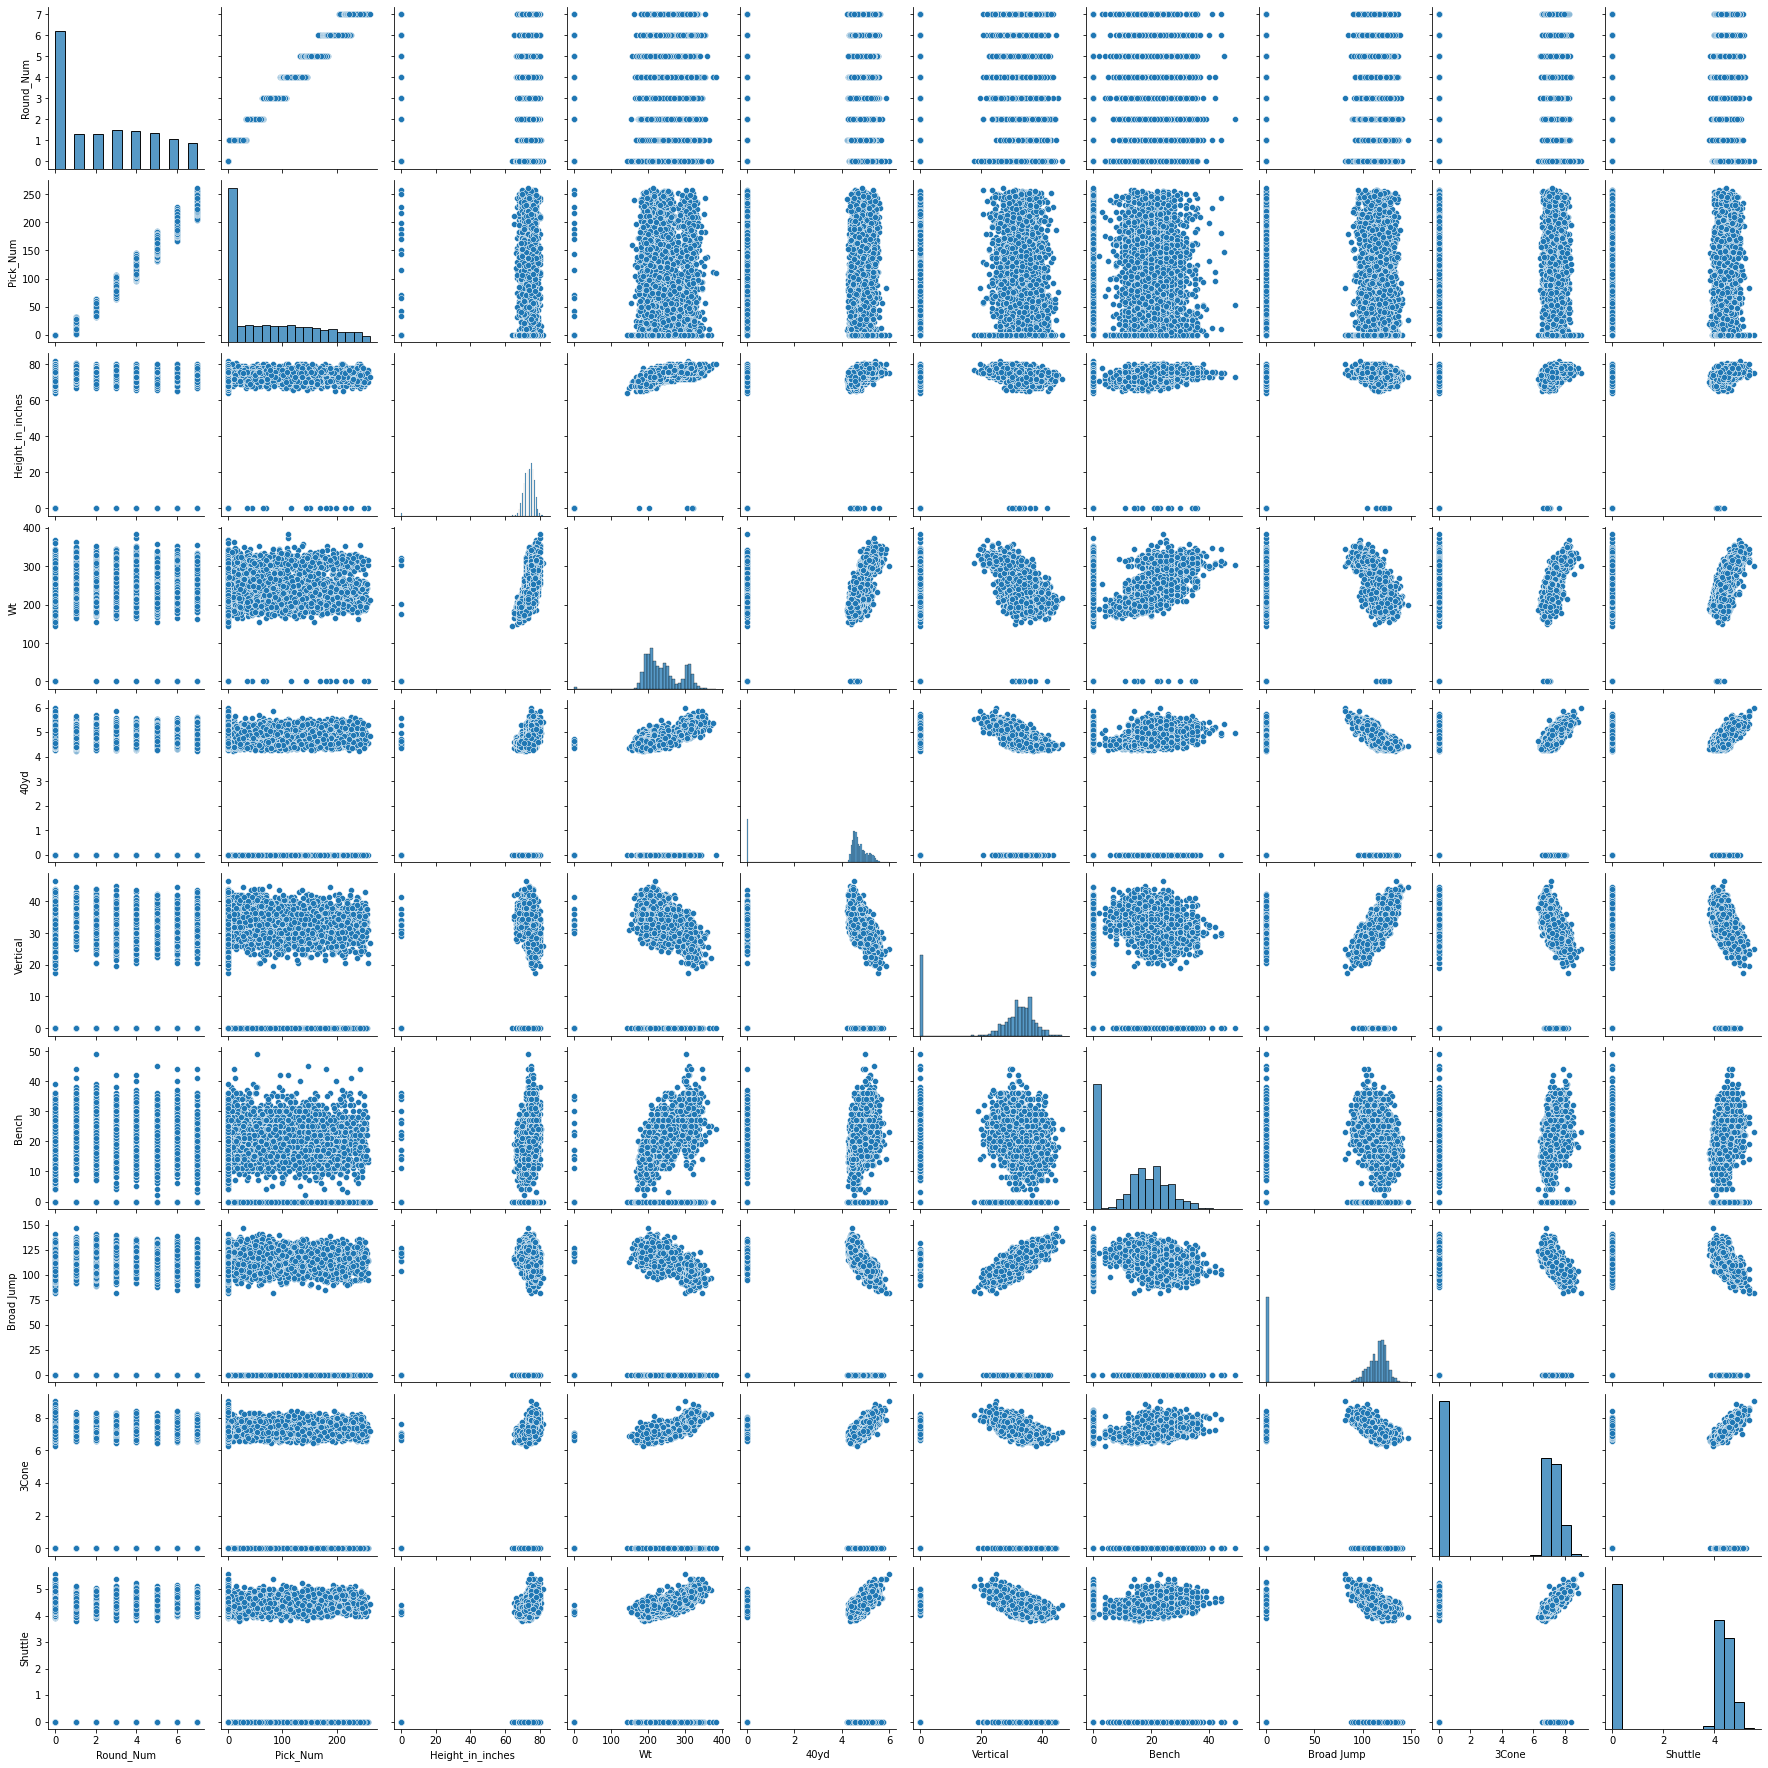

In [174]:
sns.pairplot(combine_df)

In [175]:
combine_df = combine_df.set_index('Player')

In [176]:
speed_df = combine_df[combine_df['40yd']!= 0].sort_values('40yd', ascending=True)
speed_df.head(20)

,Pos,School,Drafted_Team,Round_Num,Pick_Num,Year,Height_in_inches,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
Player,,,,,,,,,,,,,,
John Ross,WR,Washington,Cincinnati Bengals,1,9,2017,71.0,188.0,4.22,37.0,0.0,133.0,0.00,0.00
Kalon Barnes,DB,Baylor,Carolina Panthers,7,242,2022,72.0,183.0,4.23,0.0,0.0,0.0,0.00,0.00
Tariq Woolen,DB,Texas-San Antonio,Seattle Seahawks,5,153,2022,76.0,205.0,4.26,42.0,0.0,0.0,0.00,0.00
Dri Archer,WR,Kent State,Pittsburgh Steelers,3,97,2014,68.0,173.0,4.26,38.0,20.0,122.0,6.86,4.06
DJ Turner,DB,Michigan,Cincinnati Bengals,2,60,2023,71.0,178.0,4.26,38.5,0.0,131.0,0.00,0.00
Anthony Schwartz,WR,Auburn,Cleveland Browns,3,91,2021,72.0,186.0,4.27,32.0,0.0,123.0,7.13,4.25
Marquise Goodwin,WR,Texas,Buffalo Bills,3,78,2013,69.0,183.0,4.27,0.0,13.0,132.0,0.00,0.00
Henry Ruggs III,WR,Alabama,Las Vegas Raiders,1,12,2020,71.0,188.0,4.27,42.0,0.0,131.0,0.00,0.00
Jacoby Ford,WR,Clemson,Oakland Raiders,4,108,2010,69.0,186.0,4.28,33.5,15.0,115.0,7.00,4.44


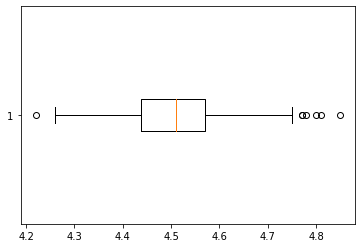

In [177]:
wr_df = speed_df[speed_df['Pos']== 'WR']
plt.boxplot( wr_df['40yd'], vert = False)
plt.show()

(1.0, 260.0)

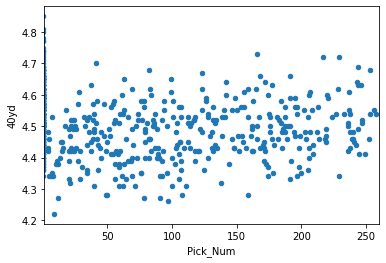

In [178]:
wr_df.plot.scatter(x = 'Pick_Num', y = '40yd' )
plt.xlim(1,260)

(0.1, 260.0)

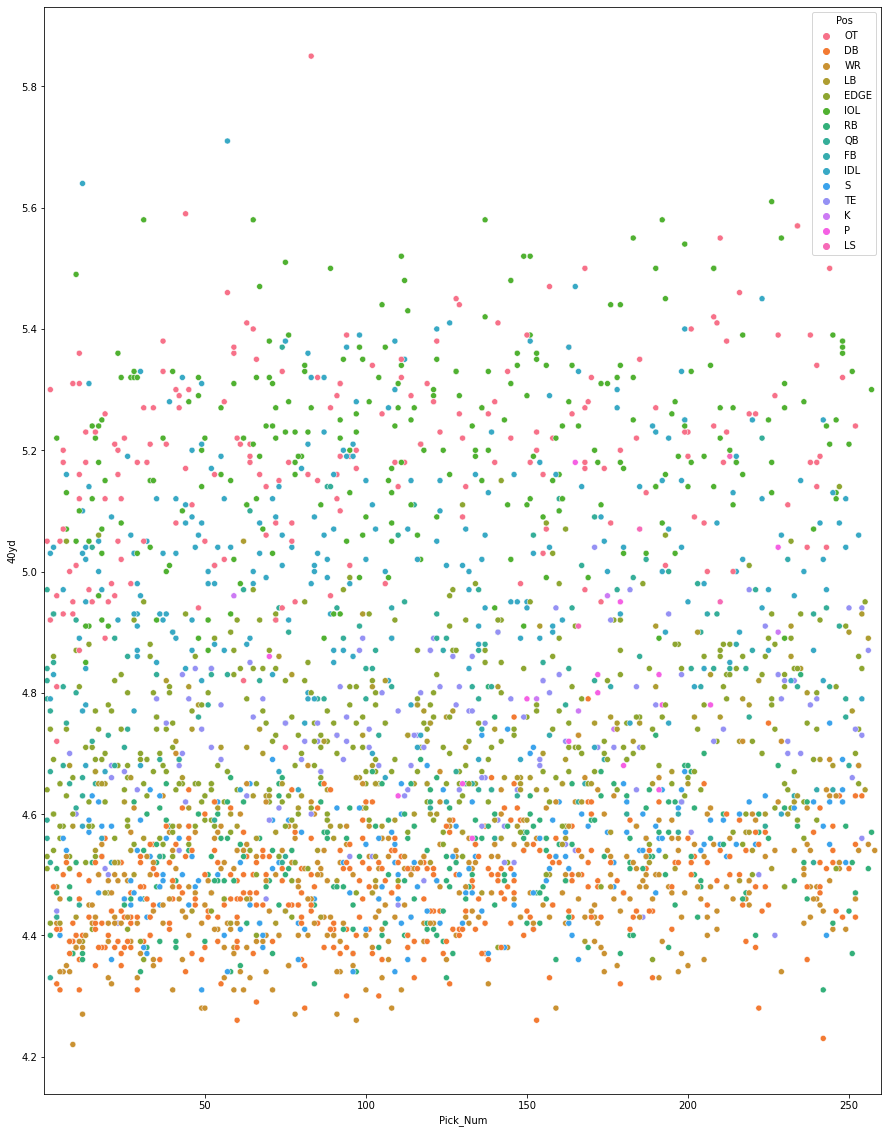

In [179]:
drafted40yd_df = combine_df[(combine_df['40yd'] > 0) & (combine_df['Round_Num'] > 0)]
#plt.subplots(figsize = (20,15))
plt.figure(figsize = (15,20))
sns.scatterplot(data = drafted40yd_df, x = 'Pick_Num', y = '40yd',hue = 'Pos' )

plt.xlim(.1,260)



Find the drafted players from the University of Maryland and were invited to the combine, then sort them by the highest pick

In [180]:
md_df = combine_df[combine_df['School'] == 'Maryland']
md_df = md_df[md_df['Pick_Num']!=0]
md_df.sort_values('Pick_Num', ascending= True)


,Pos,School,Drafted_Team,Round_Num,Pick_Num,Year,Height_in_inches,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
Player,,,,,,,,,,,,,,
Darnell Savage,S,Maryland,Green Bay Packers,1,21,2019,71.0,198.0,4.36,39.5,11.0,126.0,7.03,4.14
Deonte Banks,DB,Maryland,New York Giants,1,24,2023,72.0,197.0,4.35,42.0,0.0,136.0,0.00,0.00
D.J. Moore,WR,Maryland,Carolina Panthers,1,24,2018,72.0,210.0,4.42,39.5,15.0,132.0,6.95,4.07
Torrey Smith,WR,Maryland,Baltimore Ravens,2,58,2011,73.0,204.0,4.41,41.0,19.0,126.0,6.72,4.13
Sean Davis,DB,Maryland,Pittsburgh Steelers,2,58,2016,73.0,201.0,4.46,37.5,21.0,126.0,6.64,3.97
Yannick Ngakoue,EDGE,Maryland,Jacksonville Jaguars,3,69,2016,74.0,252.0,4.75,34.5,26.0,118.0,7.35,4.50
Dexter McDougle,DB,Maryland,New York Jets,3,80,2014,70.0,196.0,4.47,0.0,0.0,0.0,0.00,0.00
Nick Cross,S,Maryland,Indianapolis Colts,3,96,2022,72.0,212.0,4.34,37.0,0.0,130.0,0.00,0.00
Jakorian Bennett,DB,Maryland,Las Vegas Raiders,4,104,2023,71.0,188.0,4.30,40.5,13.0,133.0,0.00,0.00


Get only the drafted players into a dataframe

In [181]:
drafted_df = combine_df[combine_df['Pick_Num']!=0]
drafted_df.head()

,Pos,School,Drafted_Team,Round_Num,Pick_Num,Year,Height_in_inches,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
Player,,,,,,,,,,,,,,
Oday Aboushi,OT,Virginia,New York Jets,5,141,2013,77.0,308.0,5.41,23.5,17.0,100.0,7.92,4.84
Robert Alford,DB,SE Louisiana,Atlanta Falcons,2,60,2013,70.0,188.0,4.39,40.0,17.0,132.0,6.89,4.23
Keenan Allen,WR,California,San Diego Chargers,3,76,2013,74.0,206.0,4.58,0.0,0.0,0.0,0.00,0.00
Kiko Alonso,LB,Oregon,Buffalo Bills,2,46,2013,75.0,238.0,4.74,0.0,0.0,0.0,0.00,0.00
David Amerson,DB,North Carolina State,Washington Redskins,2,51,2013,73.0,205.0,4.44,35.5,15.0,127.0,0.00,0.00


Find the total number of drafted players per college team

The result using the top 10 teams makes sense as most of these are considered 'blue blood' programs or powerhouses in the college football world, while others have been very good programs in the past decade

In [182]:
school_count_df = pd.DataFrame(drafted_df['School'].value_counts())
school_count_df.rename(columns = {'School': 'Num_Drafted_Count'}, inplace= True)
school_count_df.head(10)

,Num_Drafted_Count
Alabama,110
LSU,92
Georgia,89
Florida,81
Oklahoma,69
Clemson,69
Ohio State,67
Notre Dame,62
USC,59
Michigan,58


### Correlation Matrix

Utilizing the 40 yard and position data a correlation matrix can be made which shows the correlation of positions and 40 yard times on the interval listed on the X axis

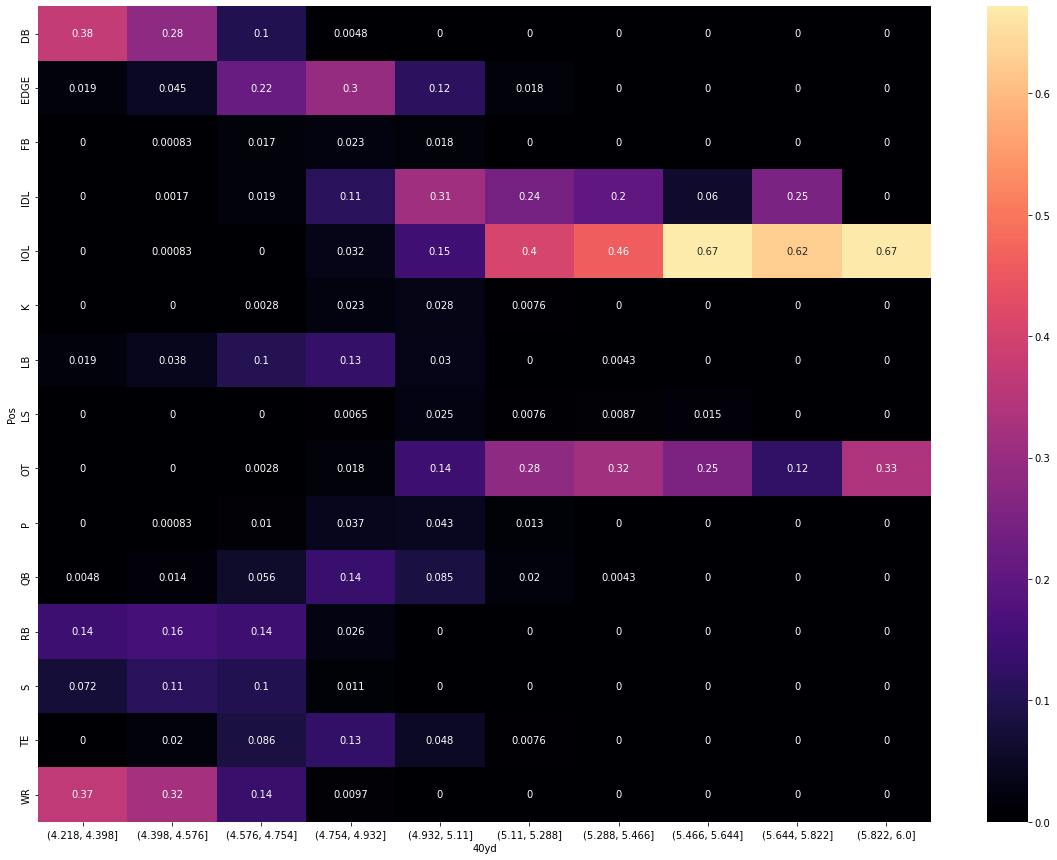

In [183]:
speed_discretized = pd.cut(speed_df['40yd'], bins = 10)
contingency_tbl = pd.crosstab(speed_df.Pos, speed_discretized)
prob_tbl = contingency_tbl/contingency_tbl.sum()
plt.subplots(figsize = (20,15))
sns.heatmap(prob_tbl, annot =True, cmap ='magma',center = .35)
plt.show()

In [184]:
drafted_df = combine_df[combine_df['Round_Num']> 0]
contingency_tbl = pd.crosstab(drafted_df.Round_Num,drafted_df.Pos)
contingency_tbl

Pos,DB,EDGE,FB,IDL,IOL,K,LB,LS,OT,P,QB,RB,S,TE,WR
Round_Num,,,,,,,,,,,,,,,
1,58,72,0,50,36,0,23,0,49,0,43,20,23,11,53
2,61,67,0,43,35,1,20,0,34,0,13,36,33,26,67
3,67,69,0,55,52,1,38,0,35,1,18,37,27,34,62
4,63,67,4,36,48,3,26,0,26,3,23,51,38,32,60
5,63,53,4,43,40,6,37,1,28,7,17,37,32,28,51
6,38,42,5,30,44,3,23,3,21,8,19,41,32,16,57
7,38,52,7,31,27,3,24,0,24,4,17,24,17,22,39


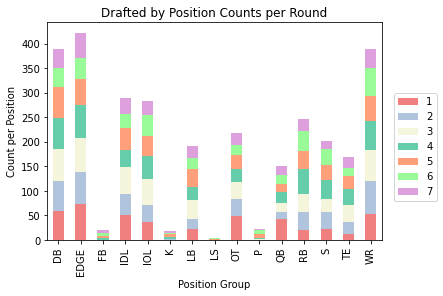

In [185]:
#plt.subplots(figsize = (20,25))
ax = drafted_df.groupby(['Pos','Round_Num']).size().unstack().plot.bar(stacked = True, color = ['lightcoral','lightsteelblue','beige','mediumaquamarine','lightsalmon','palegreen','plum'])
plt.title('Drafted by Position Counts per Round')
plt.xlabel('Position Group')
plt.ylabel('Count per Position')
plt.legend(loc = 'upper center', bbox_to_anchor = (1.1,.7))


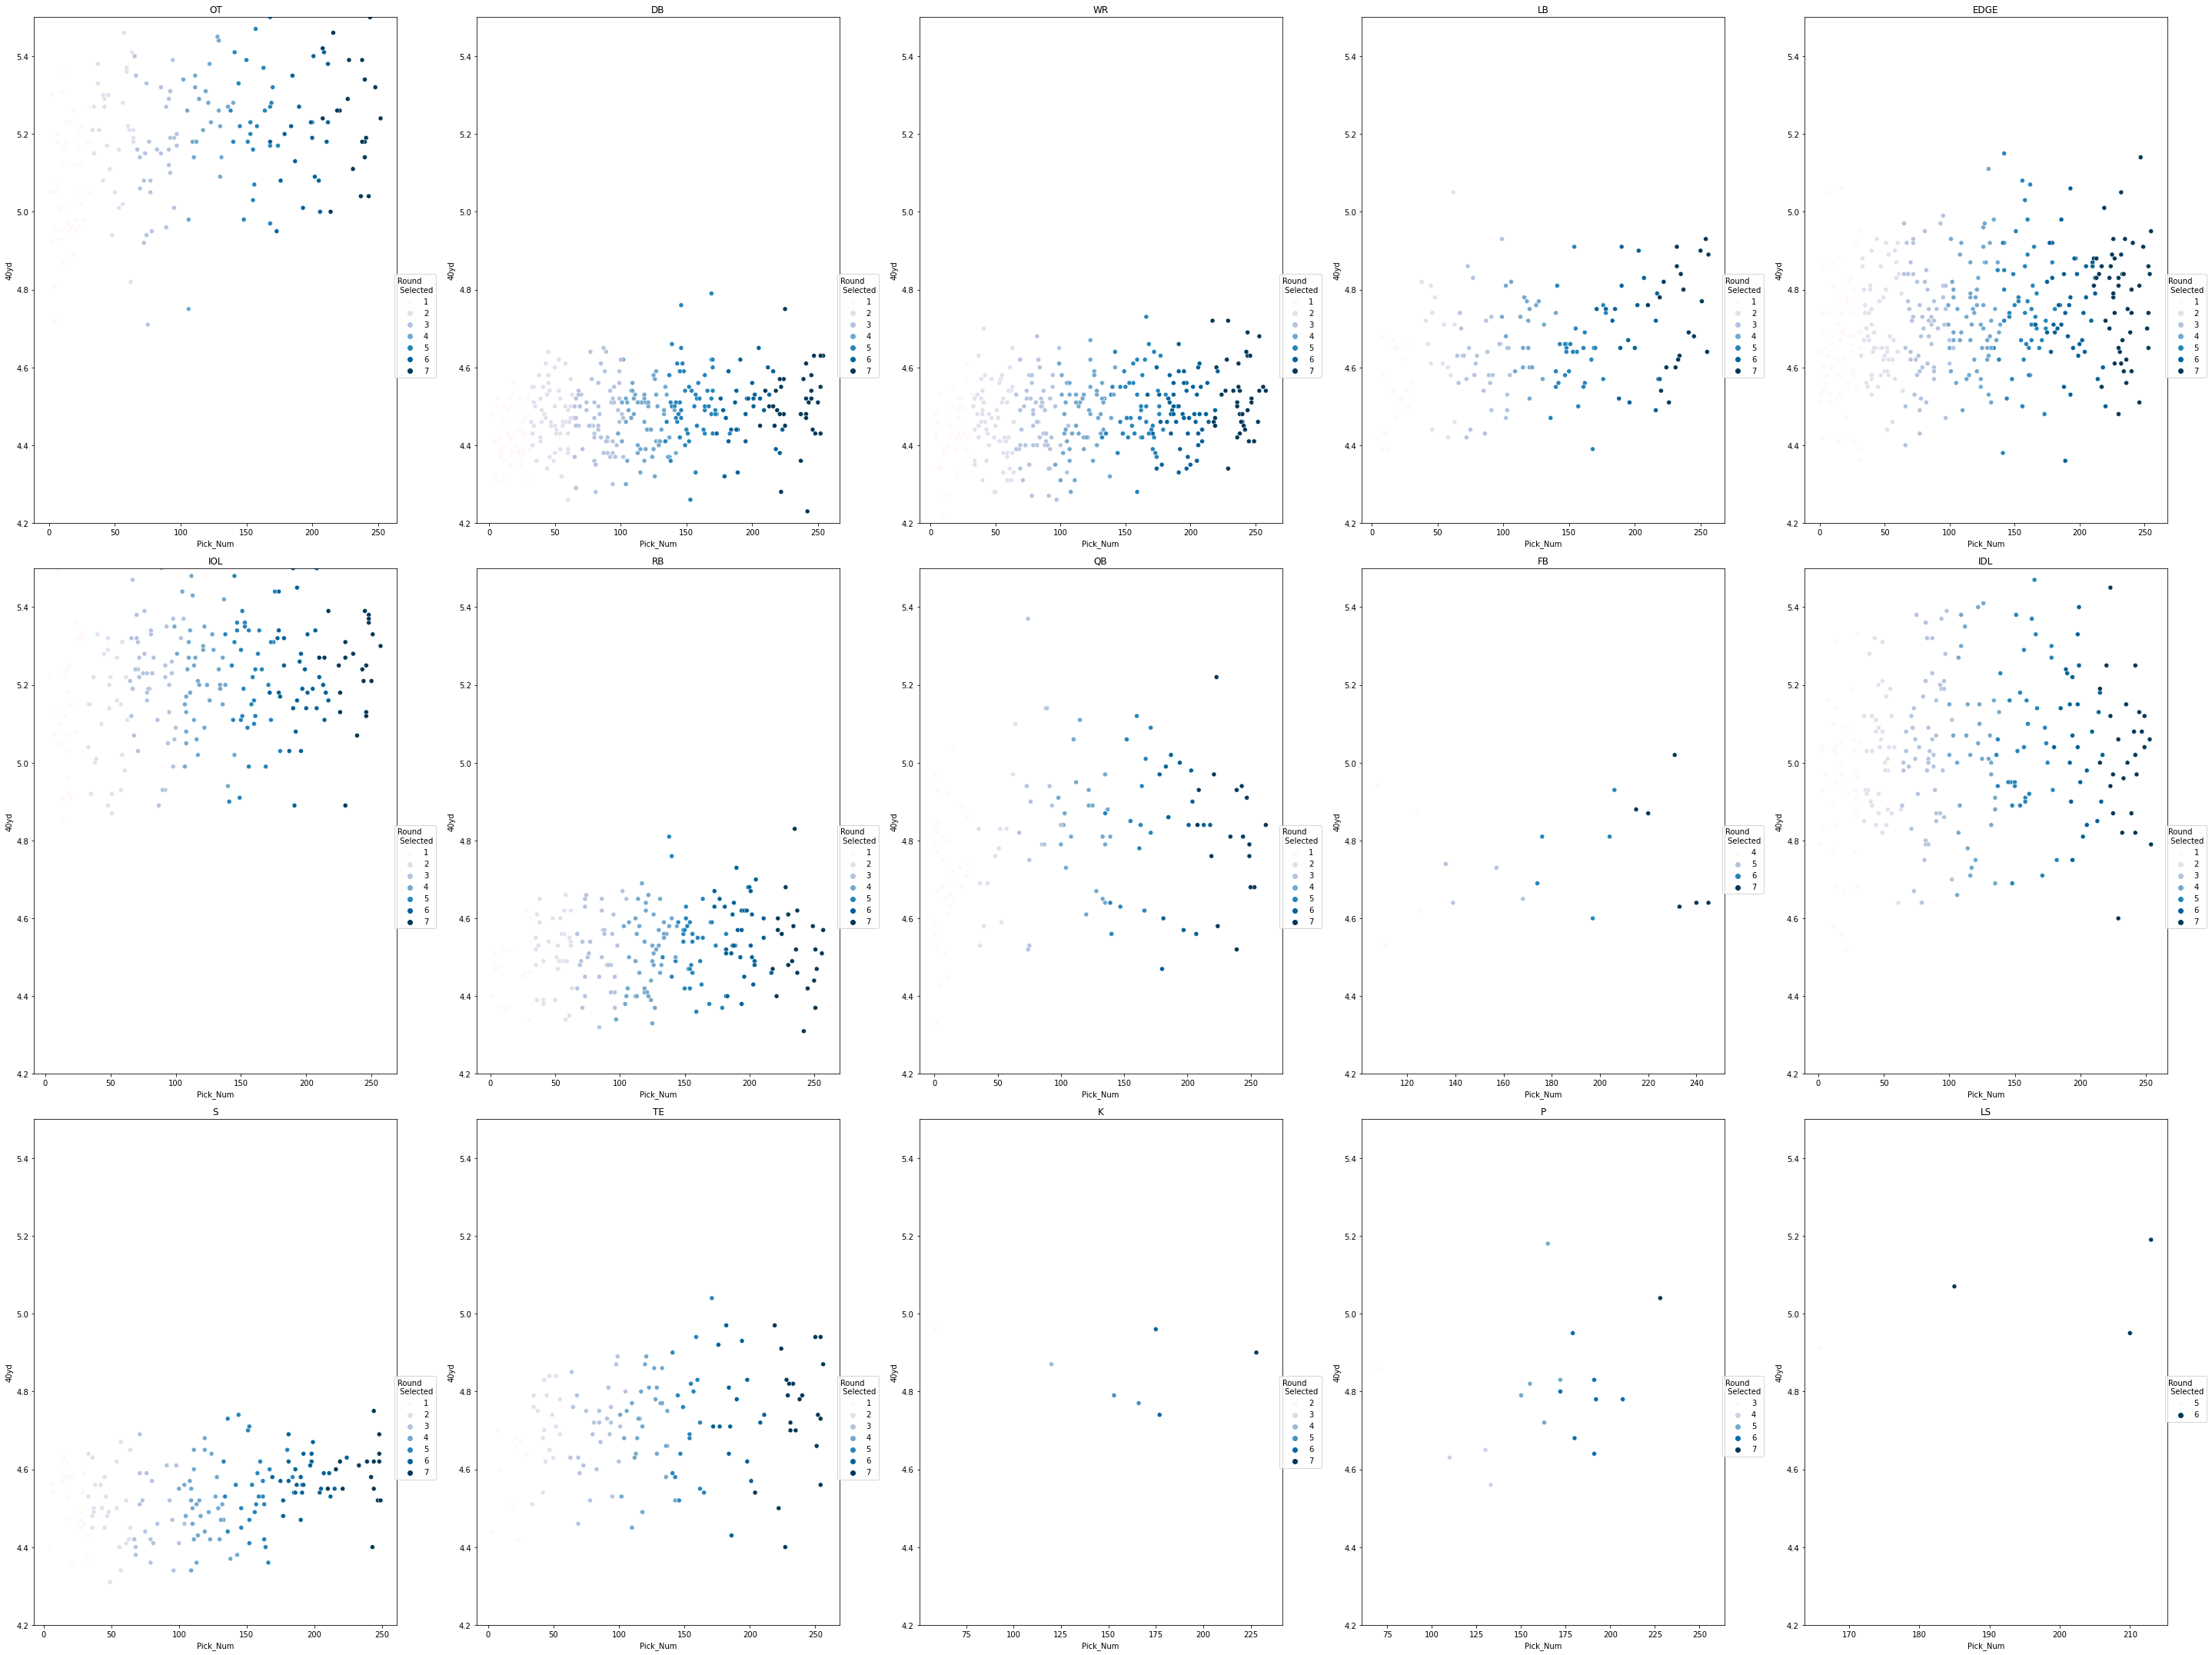

In [186]:
plt.figure(figsize = (40,30))
pos_num = drafted_df.Pos.unique()
for i, pos in enumerate (pos_num):
    BM = drafted_df.Pos == pos
    X = drafted_df[BM]['Pick_Num']
    Y = drafted_df[BM]['40yd']
    Z = drafted_df[BM]['Round_Num']
    plt.subplot(3,5,i+1)
    ax = sns.scatterplot(data = drafted_df,x = X,y = Y, hue = Z, palette = 'PuBu')
    plt.title(pos)
    plt.ylim([4.2,5.5])

    plt.legend(loc = 'upper center',bbox_to_anchor = (1.05,.5), title = 'Round \n Selected')
    
   

plt.tight_layout(w_pad= 2)
plt.show()


I wanted to see if there would be any major differences between the two correlation matrix, with the second one only inclding those who were drafted

In [187]:
speed_drafted_df = speed_df[speed_df['Round_Num']> 0]

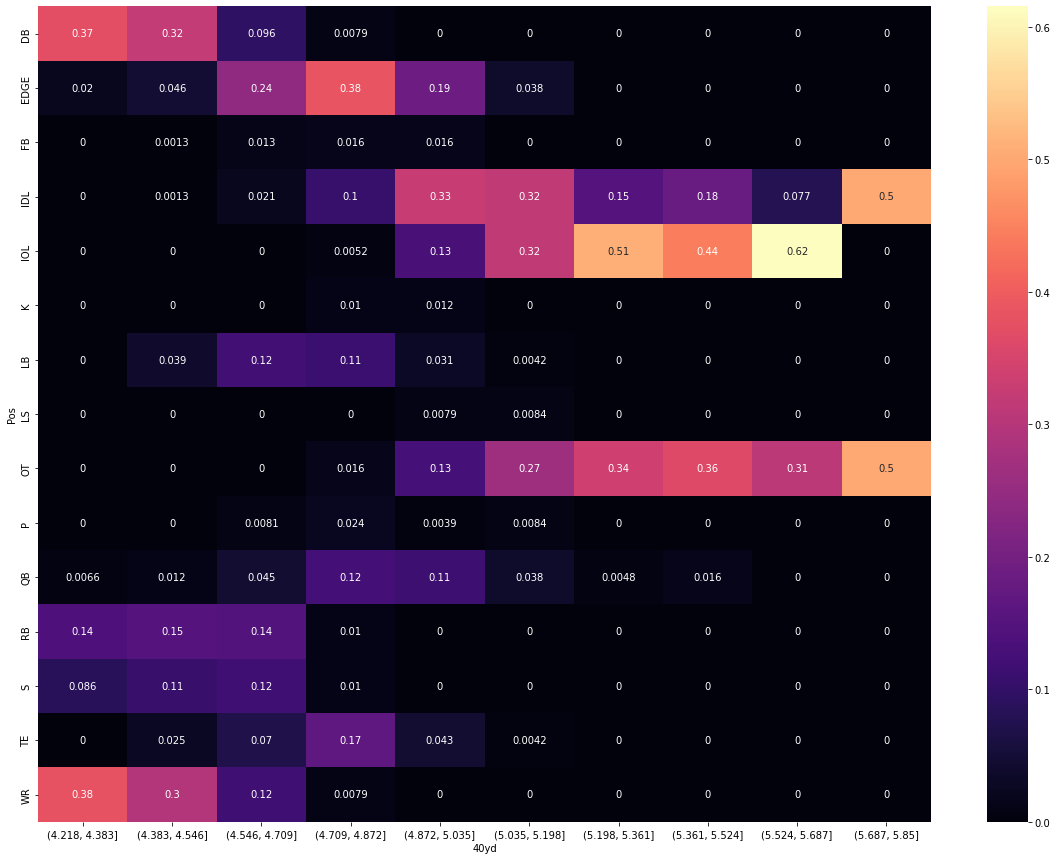

In [188]:
speed_discretized = pd.cut(speed_drafted_df['40yd'], bins = 10)
contingency_tbl = pd.crosstab(speed_drafted_df.Pos, speed_discretized)
prob_tbl = contingency_tbl/contingency_tbl.sum()
plt.subplots(figsize = (20,15))
sns.heatmap(prob_tbl, annot =True, cmap ='magma', center = .3 )
plt.show()

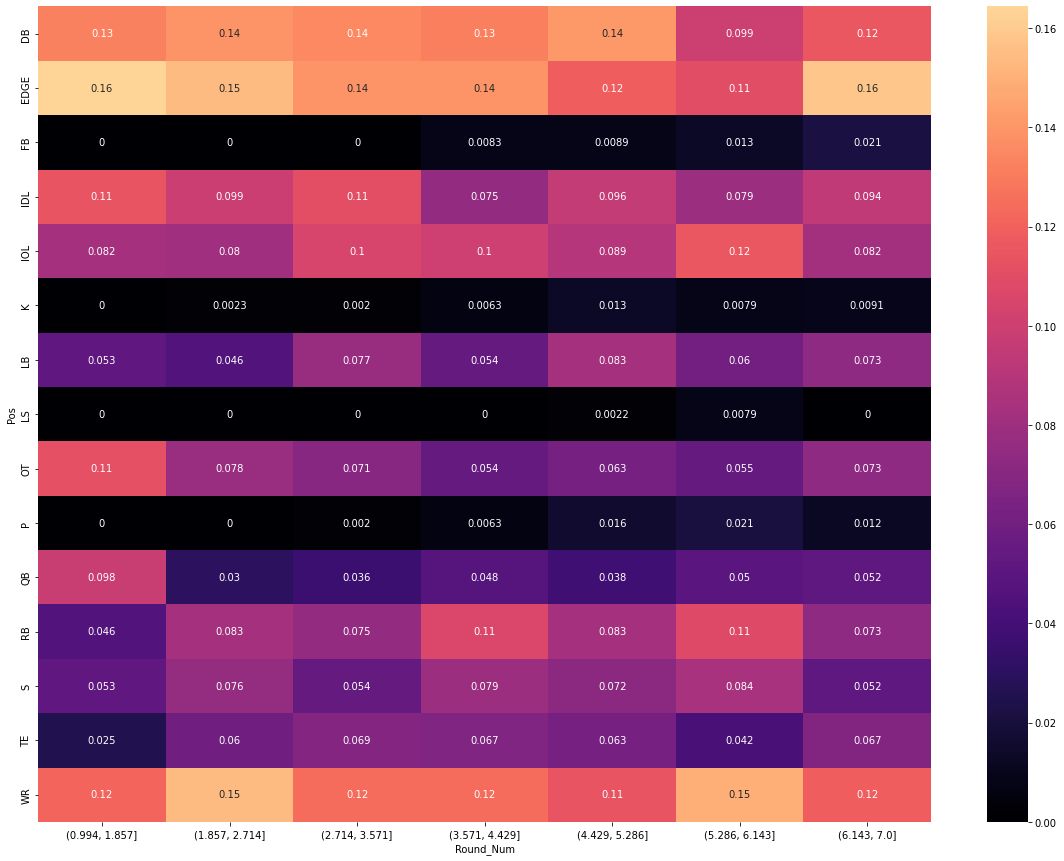

In [189]:
draft_discretized = pd.cut(drafted_df.Round_Num, bins = 7)
contingency_tbl = pd.crosstab(drafted_df.Pos, draft_discretized)
prob_tbl = contingency_tbl/contingency_tbl.sum()
plt.subplots(figsize = (20,15))
sns.heatmap(prob_tbl, annot =True, cmap ='magma', center = .09)
plt.show()

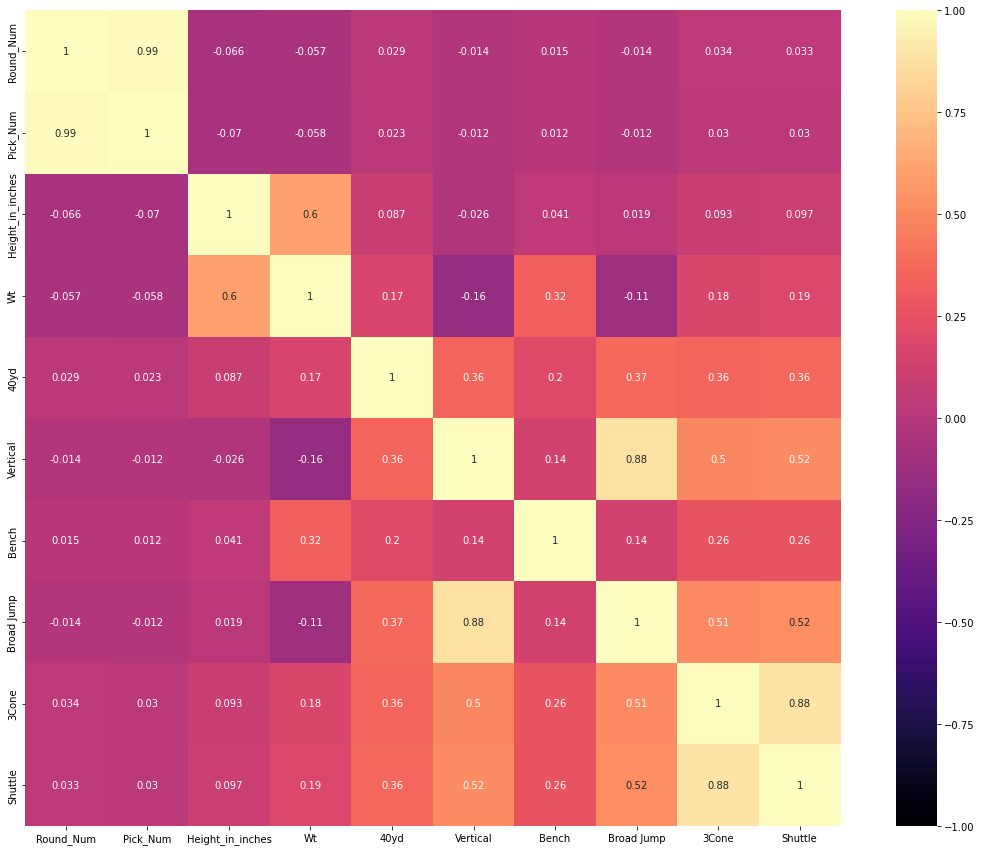

In [190]:
corr = drafted_df.corr()

plt.subplots(figsize = (20,15))
ax = sns.heatmap(
    corr,
    vmin = -1, vmax = 1, center = 0,
    cmap = 'magma',
    annot = True,
    square = True
)



from sklearn.tree import DecisionTreeClassifier, plot_tree

predictor = ['Height_in_inches', 'Wt','40yd','Vertical','Bench','Broad Jump', '3Cone']
target = 'Round_Num'

Xs = combine_df[predictor].drop(index = 20)
y =  combine_df[target].drop(index = 20)

classTree = DecisionTreeClassifier()
classTree.fit(Xs,y)
new_draft = pd.DataFrame({
                          'Height_in_inches': combine_df.loc[20].Height_in_inches,
                          'Wt': combine_df.loc[20].Wt,
                          '40yd': combine_df.loc[20]['40yd'],
                          'Vertical': combine_df.loc[20].Vertical,
                          'Bench': combine_df.loc[20].Bench,
                          'Broad Jump': combine_df.loc[20]['Broad Jump'],
                          '3Cone': combine_df.loc[20]['3Cone']
})
new_draft = pd.DataFrame({
                          'Height_in_inches': combine_df.loc[20].Height_in_inches,
                          'Wt': combine_df.loc[20].Wt,
                          '40yd': combine_df.loc[20]['40yd'],
                          'Vertical': combine_df.loc[20].Vertical,
                          'Bench': combine_df.loc[20].Bench,
                          'Broad Jump': combine_df.loc[20]['Broad Jump'],
                          '3Cone': combine_df.loc[20]['3Cone']
})

predict_y = classTree.predict(new_draft)
print(predict_y)

from sklearn import tree
X = combine_df['40yd']
Y = combine_df['Round_Num']

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [191]:
draft_result = pd.read_csv('data/Draft_Results_2022.csv')
draft_result.head()

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,Att.1,Yds.1,TD.1,Rec,Yds.2,TD.2,Solo,Int.1,Sk,College/Univ
0,1,1,JAX,Travon Walker,DE,21,2022.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,24.0,1.0,3.5,Georgia
1,1,2,DET,Aidan Hutchinson,DE,22,2022.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,34.0,3.0,9.5,Michigan
2,1,3,HOU,Derek Stingley Jr.,CB,21,2022.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,1.0,LSU
3,1,4,NYJ,Sauce Gardner,CB,22,2022.0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,51.0,2.0,NaN,Cincinnati
4,1,5,NYG,Kayvon Thibodeaux,DE,21,2022.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,33.0,NaN,4.0,Oregon


### Merging Player Statistic Datasets

In [202]:
FileNames = glob.glob('data/Draft_Results_*.csv')
print(FileNames)

['data/Draft_Results_2012.csv', 'data/Draft_Results_2013.csv', 'data/Draft_Results_2011.csv', 'data/Draft_Results_2010.csv', 'data/Draft_Results_2014.csv', 'data/Draft_Results_2015.csv', 'data/Draft_Results_2017.csv', 'data/Draft_Results_2016.csv', 'data/Draft_Results_2018.csv', 'data/Draft_Results_2019.csv', 'data/Draft_Results_2021.csv', 'data/Draft_Results_2020.csv', 'data/Draft_Results_2022.csv', 'data/Draft_Results_2023.csv']


In [203]:
draft_df = pd.concat(pd.read_csv(f) for f in FileNames)
draft_df.head()

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,TD.1,Rec,Yds.2,TD.2,Solo,Int.1,Sk,College/Univ,Unnamed: 28,-9999
0,1,1,IND,Andrew Luck,QB,22.0,2018.0,0,4,5,...,14.0,1.0,4.0,0.0,NaN,NaN,NaN,Stanford,NaN,NaN
1,1,2,WAS,Robert Griffin III,QB,22.0,2020.0,0,1,3,...,10.0,0.0,0.0,0.0,NaN,NaN,NaN,Baylor,NaN,NaN
2,1,3,CLE,Trent Richardson,RB,22.0,2014.0,0,0,3,...,17.0,113.0,912.0,2.0,NaN,NaN,NaN,Alabama,NaN,NaN
3,1,4,MIN,Matt Kalil,T,23.0,2017.0,0,1,5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,USC,NaN,NaN
4,1,5,JAX,Justin Blackmon,WR,22.0,2013.0,0,0,1,...,0.0,93.0,1280.0,6.0,NaN,NaN,NaN,Oklahoma St.,NaN,NaN


In [204]:
draft_combine_df = drafted_df.merge(draft_df, left_on='Player',right_on='Player')
draft_combine_df.drop(['Unnamed: 28','-9999', 'College/Univ'],axis = 1,  inplace= True)
draft_combine_df.head()

,Player,Pos_x,School,Drafted_Team,Round_Num,Pick_Num,Year,Height_in_inches,Wt,40yd,...,Int,Att.1,Yds.1,TD.1,Rec,Yds.2,TD.2,Solo,Int.1,Sk
0,Oday Aboushi,OT,Virginia,New York Jets,5,141,2013,77.0,308.0,5.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,Robert Alford,DB,SE Louisiana,Atlanta Falcons,2,60,2013,70.0,188.0,4.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,280.0,11.0,NaN
2,Keenan Allen,WR,California,San Diego Chargers,3,76,2013,74.0,206.0,4.58,...,0.0,16.0,107.0,0.0,796.0,9287.0,52.0,4.0,1.0,NaN
3,Kiko Alonso,LB,Oregon,Buffalo Bills,2,46,2013,75.0,238.0,4.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,369.0,10.0,3.0
4,David Amerson,DB,North Carolina State,Washington Redskins,2,51,2013,73.0,205.0,4.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,234.0,9.0,NaN


In [205]:
draft_combine_df.columns

Index(['Player', 'Pos_x', 'School', 'Drafted_Team', 'Round_Num', 'Pick_Num',
       'Year', 'Height_in_inches', 'Wt', '40yd', 'Vertical', 'Bench',
       'Broad Jump', '3Cone', 'Shuttle', 'Rnd', 'Pick', 'Tm', 'Pos_y', 'Age',
       'To', 'AP1', 'PB', 'St', 'wAV', 'DrAV', 'G', 'Cmp', 'Att', 'Yds', 'TD',
       'Int', 'Att.1', 'Yds.1', 'TD.1', 'Rec', 'Yds.2', 'TD.2', 'Solo',
       'Int.1', 'Sk'],
      dtype='object')

Renaming the columns that are repeated

In [206]:
draft_combine_df = draft_combine_df.rename({'Pos_x':'Position','To':'l_yr_played','AP1':'All_Pros','PB':'Pro_Bowls','St':'Years_Started','wAv':'Weighted_Approx_Val',
                                            'DrAV':'Drafted_Approx_Val','G':'Games_Played','CMP':'Completions','Att':'Pass_Attempt','Yds':'Pass_Yards','TD':'Pass_TD',
                                            'Int':'Thrown_Int','Att.1':'Rush_Att','Yds.1':'Rush_Yd','TD.1':'Rush_Td','Yds.2':'Rec_Yard','Td.2':'Rec_Td','Solo':'Solo_tkl','Int.1':'Int'}, axis  =1)
draft_combine_df.head()

,Player,Position,School,Drafted_Team,Round_Num,Pick_Num,Year,Height_in_inches,Wt,40yd,...,Thrown_Int,Rush_Att,Rush_Yd,Rush_Td,Rec,Rec_Yard,TD.2,Solo_tkl,Int,Sk
0,Oday Aboushi,OT,Virginia,New York Jets,5,141,2013,77.0,308.0,5.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,Robert Alford,DB,SE Louisiana,Atlanta Falcons,2,60,2013,70.0,188.0,4.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,280.0,11.0,NaN
2,Keenan Allen,WR,California,San Diego Chargers,3,76,2013,74.0,206.0,4.58,...,0.0,16.0,107.0,0.0,796.0,9287.0,52.0,4.0,1.0,NaN
3,Kiko Alonso,LB,Oregon,Buffalo Bills,2,46,2013,75.0,238.0,4.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,369.0,10.0,3.0
4,David Amerson,DB,North Carolina State,Washington Redskins,2,51,2013,73.0,205.0,4.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,234.0,9.0,NaN


In [207]:
draft_combine_df = draft_combine_df.fillna(0)
draft_combine_df.head()

,Player,Position,School,Drafted_Team,Round_Num,Pick_Num,Year,Height_in_inches,Wt,40yd,...,Thrown_Int,Rush_Att,Rush_Yd,Rush_Td,Rec,Rec_Yard,TD.2,Solo_tkl,Int,Sk
0,Oday Aboushi,OT,Virginia,New York Jets,5,141,2013,77.0,308.0,5.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Robert Alford,DB,SE Louisiana,Atlanta Falcons,2,60,2013,70.0,188.0,4.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,280.0,11.0,0.0
2,Keenan Allen,WR,California,San Diego Chargers,3,76,2013,74.0,206.0,4.58,...,0.0,16.0,107.0,0.0,796.0,9287.0,52.0,4.0,1.0,0.0
3,Kiko Alonso,LB,Oregon,Buffalo Bills,2,46,2013,75.0,238.0,4.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,369.0,10.0,3.0
4,David Amerson,DB,North Carolina State,Washington Redskins,2,51,2013,73.0,205.0,4.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,234.0,9.0,0.0


In [208]:
draft_combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915 entries, 0 to 2914
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              2915 non-null   object 
 1   Position            2915 non-null   object 
 2   School              2915 non-null   object 
 3   Drafted_Team        2915 non-null   string 
 4   Round_Num           2915 non-null   int64  
 5   Pick_Num            2915 non-null   int64  
 6   Year                2915 non-null   string 
 7   Height_in_inches    2915 non-null   float64
 8   Wt                  2915 non-null   float64
 9   40yd                2915 non-null   float64
 10  Vertical            2915 non-null   float64
 11  Bench               2915 non-null   float64
 12  Broad Jump          2915 non-null   float64
 13  3Cone               2915 non-null   float64
 14  Shuttle             2915 non-null   float64
 15  Rnd                 2915 non-null   int64  
 16  Pick  

In [209]:
approx_val_df = draft_combine_df[draft_combine_df['wAV']>0.0]
approx_val_df = approx_val_df.set_index('wAV')

In [210]:
approx_val_df = approx_val_df.sort_index(ascending= False)
approx_val_df.head(20)

,Player,Position,School,Drafted_Team,Round_Num,Pick_Num,Year,Height_in_inches,Wt,40yd,...,Thrown_Int,Rush_Att,Rush_Yd,Rush_Td,Rec,Rec_Yard,TD.2,Solo_tkl,Int,Sk
wAV,,,,,,,,,,,,,,,,,,,,,
130.0,Russell Wilson,QB,Wisconsin,Seattle Seahawks,3,75,2012,71.0,204.0,4.53,...,98.0,901.0,4966.0,26.0,5.0,21.0,1.0,0.0,0.0,0.0
115.0,Cam Newton,QB,Auburn,Carolina Panthers,1,1,2011,77.0,248.0,4.56,...,123.0,1118.0,5628.0,75.0,3.0,68.0,1.0,0.0,0.0,0.0
115.0,Aaron Donald,IDL,Pittsburgh,St. Louis Rams,1,13,2014,73.0,285.0,4.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.0,0.0,103.0
110.0,J.J. Watt,EDGE,Wisconsin,Houston Texans,1,11,2011,77.0,290.0,4.81,...,0.0,0.0,0.0,0.0,3.0,4.0,3.0,449.0,2.0,114.5
103.0,Von Miller,EDGE,Texas A&M,Denver Broncos,1,2,2011,75.0,246.0,4.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,431.0,2.0,123.5
101.0,Patrick Peterson,DB,LSU,Arizona Cardinals,1,5,2011,72.0,219.0,4.31,...,0.0,7.0,34.0,0.0,10.0,64.0,0.0,537.0,34.0,4.0
100.0,Ndamukong Suh,IDL,Nebraska,Detroit Lions,1,2,2010,76.0,307.0,5.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,392.0,1.0,71.5
100.0,Julio Jones,WR,Alabama,Atlanta Falcons,1,6,2011,75.0,220.0,4.34,...,0.0,24.0,163.0,0.0,903.0,13629.0,63.0,2.0,0.0,0.0
97.0,Richard Sherman,DB,Stanford,Seattle Seahawks,5,154,2011,75.0,195.0,4.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,385.0,37.0,2.0


In [214]:
ala_df = draft_combine_df[draft_combine_df['School'] == 'Alabama']
ala_df = ala_df[ala_df['Round_Num'] == 1]
ala_df.sort_values('Pick_Num', ascending= True)


,Player,Position,School,Drafted_Team,Round_Num,Pick_Num,Year,Height_in_inches,Wt,40yd,...,Thrown_Int,Rush_Att,Rush_Yd,Rush_Td,Rec,Rec_Yard,TD.2,Solo_tkl,Int,Sk
2699,Bryce Young,QB,Alabama,Carolina Panthers,1,1,2023,70.0,204.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1916,Quinnen Williams,IDL,Alabama,New York Jets,1,3,2019,75.0,303.0,4.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0,0.0,27.5
2602,Will Anderson Jr.,EDGE,Alabama,Houston Texans,1,3,2023,76.0,253.0,4.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,Trent Richardson,RB,Alabama,Cleveland Browns,1,3,2012,69.0,228.0,4.48,...,0.0,614.0,2032.0,17.0,113.0,912.0,2.0,0.0,0.0,0.0
702,Marcell Dareus,IDL,Alabama,Buffalo Bills,1,3,2011,75.0,319.0,4.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,0.0,37.5
920,Amari Cooper,WR,Alabama,Oakland Raiders,1,4,2015,73.0,211.0,4.42,...,1.0,14.0,41.0,0.0,595.0,8236.0,55.0,2.0,0.0,0.0
2308,Tua Tagovailoa,QB,Alabama,Miami Dolphins,1,5,2020,72.0,217.0,0.00,...,23.0,101.0,307.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
757,Julio Jones,WR,Alabama,Atlanta Falcons,1,6,2011,75.0,220.0,4.34,...,0.0,24.0,163.0,0.0,903.0,13629.0,63.0,2.0,0.0,0.0
2833,Evan Neal,OT,Alabama,New York Giants,1,7,2022,80.0,337.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
241,Mark Barron,S,Alabama,Tampa Bay Buccaneers,1,7,2012,73.0,213.0,4.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,541.0,9.0,12.0
